In [1]:
import sys
print(sys.version)

3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:37:41) 
[Clang 10.0.1 ]


# Model Evaluation 
Name: Andrew Auyeung  
Location: 'lib/model_eval.ipynb'  

Target metrics for prediction of rain is centered around recall 

Version 1: Models trained on Base Weather Station Data  
Version 2: Models trained on Base Weather Station Data with Hurricane/Storm Data.  Models will add class weight parameters added into the gridsearch. 
Version 3: Ensemble Stacking of Models

In [31]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

In [3]:
# Open models from Version 1 
knn = pickle.load(open('../models/Version 1/knn.pickle', 'rb'))
logreg = pickle.load(open('../models/Version 1/logreg.pickle', 'rb'))
rf = pickle.load(open('../models/Version 1/rf.pickle', 'rb'))
xgb = pickle.load(open('../models/Version 1/xgb.pickle', 'rb'))
baseline = pickle.load(open('../models/Version 1/baseline.pickle', 'rb'))
test_holdout = pickle.load(open('../models/Version 1/test_holdout.pickle', 'rb'))

In [4]:
X_test = test_holdout['X_test']
y_test = test_holdout['y_test']
X_holdout = test_holdout['X_holdout']
y_holdout = test_holdout['y_holdout']

In [22]:
# Predict Proba from X_test 
knn_proba = knn.predict_proba(X_test)
logreg_proba = logreg.predict_proba(X_test)
rf_proba = rf.predict_proba(X_test)
xgb_proba = xgb.predict_proba(X_test)

# Base Predictions
knn_preds = knn.predict(X_test)
logreg_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

preds = ['knn_preds', 'logreg_preds', 'rf_preds', 'xgb_preds']


In [27]:
# Classification Reports
for model in preds: 
    print(model[:-6]+' Classification Report')
    print(classification_report(y_test, eval(model)))

knn Classification Report
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      2348
           1       0.41      0.63      0.50      1137

    accuracy                           0.58      3485
   macro avg       0.58      0.59      0.57      3485
weighted avg       0.64      0.58      0.60      3485

logreg Classification Report
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      2348
           1       0.42      0.63      0.50      1137

    accuracy                           0.60      3485
   macro avg       0.59      0.61      0.58      3485
weighted avg       0.65      0.60      0.61      3485

rf Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2348
           1       0.53      0.33      0.41      1137

    accuracy                           0.69      3485
   macro avg       0.63      0.59      0.60     

From the Classification Reports, the KNearestNeighbors Classifier has the best recall.  On days that it does rain, the model correctly predicts rain 68% of the time.  XGBoost had the highest precision where 67% of the days it predicted rain, it was correct.  

On predicting days of no rain, Random Forest and XGBoost both perform better.  

In [29]:
knn_proba = knn_proba[:,1]
logreg_proba = logreg_proba[:,1]
rf_proba = rf_proba[:,1]
xgb_proba = xgb_proba[:,1]

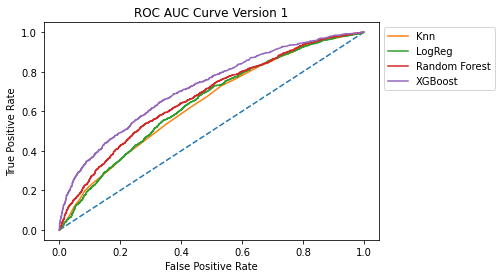

In [33]:
# ROC AUC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba, pos_label=1)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba, pos_label=1)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba, pos_label=1)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba, pos_label=1)
x_ = np.linspace(0, 1, 1000)
y_ = x_
plt.plot(x_, y_, '--')
plt.plot(fpr_knn, tpr_knn, label='Knn')
plt.plot(fpr_logreg, tpr_logreg, label='LogReg')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(1,1))
plt.title('ROC AUC Curve Version 1');

XGBoost outperforms the other models in terms of ROC. 
Potential threshold is 0.4. 